In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('./data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
voice_data.isnull().sum().sum()

0

In [5]:
X = voice_data.drop(['label'], axis=1)
y= voice_data['label']

In [6]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


[Text(0.5, 0.75, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.25, 0.25, 'entropy = 0.313\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.75, 0.25, 'entropy = 0.221\nsamples = 1238\nvalue = [1194, 44]')]

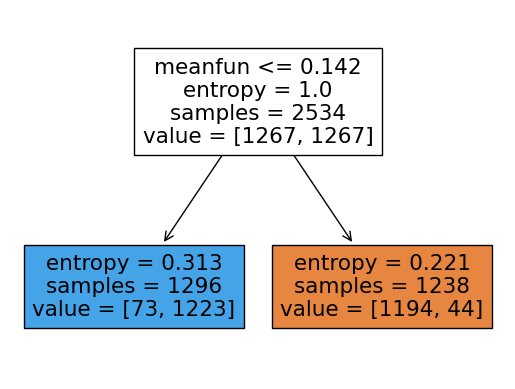

In [7]:
model_1 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=1,
    random_state=42
)

model_1.fit(X_train, y_train)

tree.plot_tree(
    decision_tree=model_1,
    feature_names=X.columns,
    filled=True,
    impurity=True
)

In [8]:
y_pred_1 = model_1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_1).round(3))
print(round(1296/2534,3))

0.956
0.511


---

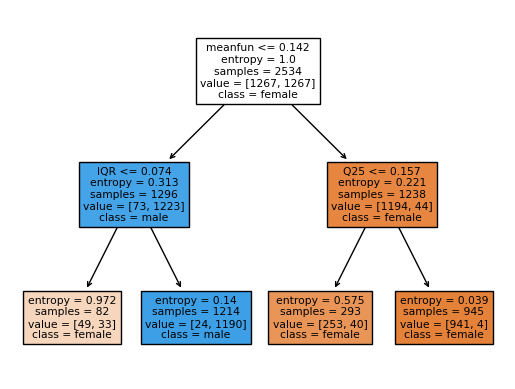

In [9]:
model_2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    random_state=42
)
model_2.fit(X_train, y_train)

tree.plot_tree(
    decision_tree=model_2,
    class_names=model_2.classes_,
    feature_names=X.columns,
    filled=True,
    impurity=True
);

In [10]:
y_pred_2 = model_2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_2).round(3))

0.962


---

In [11]:
model_3 = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
model_3.fit(X_train, y_train)
print(model_3.get_depth())
print(model_3.get_n_leaves())
y_pred_3 = model_3.predict(X_test)
y_pred_train_3 = model_3.predict(X_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, y_pred_3).round(3)}')
print(f'Train accuracy: {metrics.accuracy_score(y_train, y_pred_train_3).round(3)}')

12
54
Test accuracy: 0.973
Train accuracy: 1.0


---

In [12]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [13]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

In [14]:
grid = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1
)


In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [16]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

In [17]:
model_4 = tree.DecisionTreeClassifier(**grid.best_params_)
model_4.fit(X_train, y_train)

y_pred_4 = model_4.predict(X_test)
y_pred_train_4 = model_4.predict(X_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, y_pred_4).round(3)}')
print(f'Train accuracy: {metrics.accuracy_score(y_train, y_pred_train_4).round(3)}')

Test accuracy: 0.968
Train accuracy: 0.996


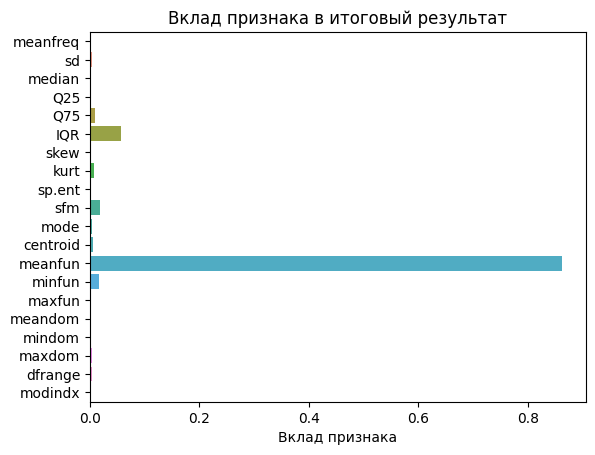

In [34]:
feats = sns.barplot(
    x=model_4.feature_importances_,
    y=model_4.feature_names_in_,

)
feats.set(
    xlabel='Вклад признака', 
    title='Вклад признака в итоговый результат',
);